In [45]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\data.csv")


# Check the first few rows
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75      

In [46]:
# Check for missing values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [48]:
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [49]:
df['Sleep Disorder'].value_counts()


None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [50]:
df.duplicated().sum()


0

In [51]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')


In [52]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [53]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [54]:
#Analysis

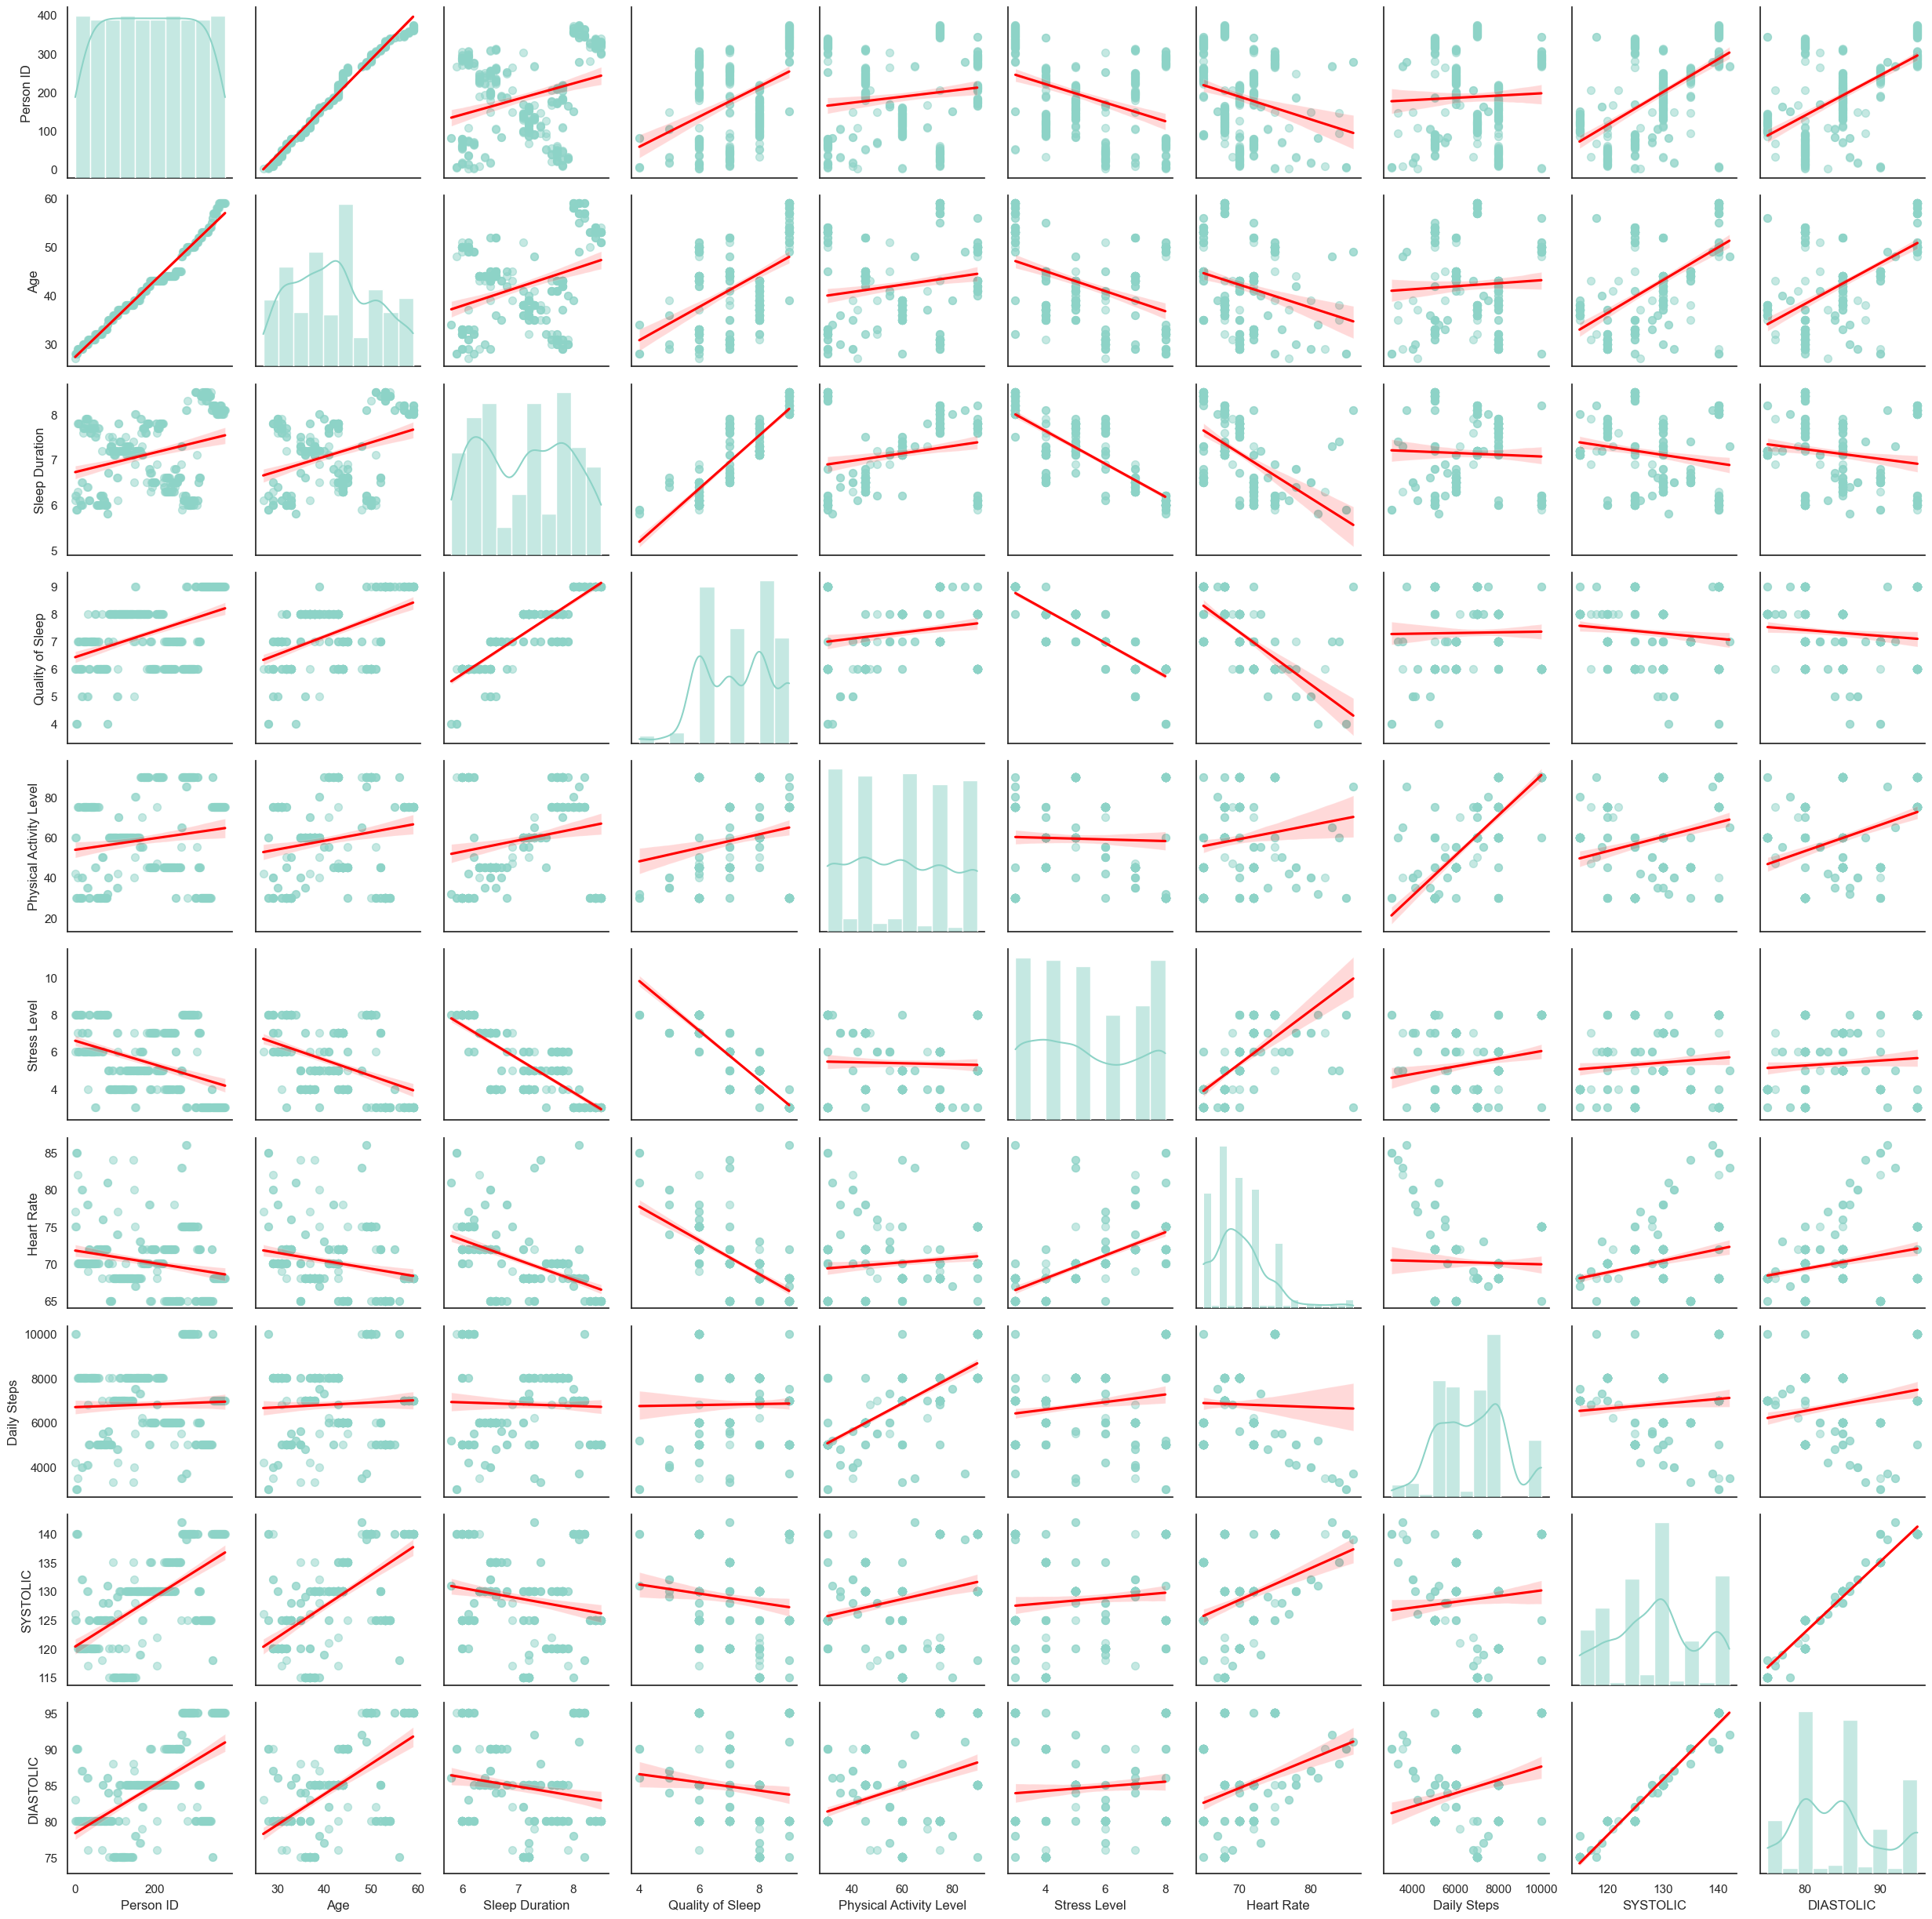

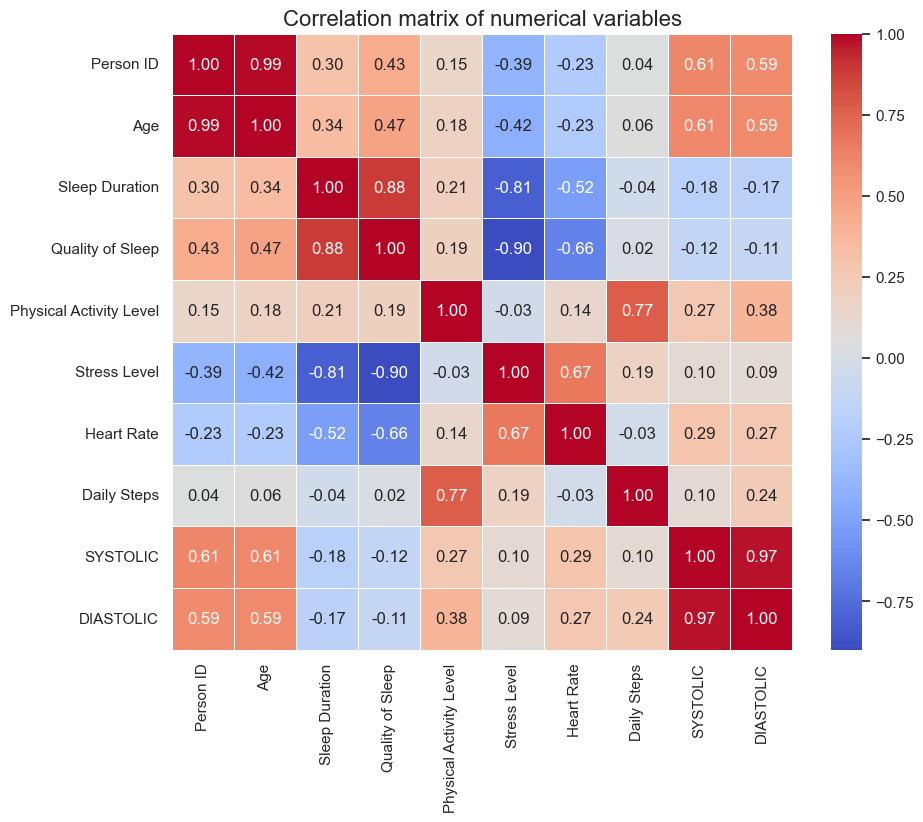

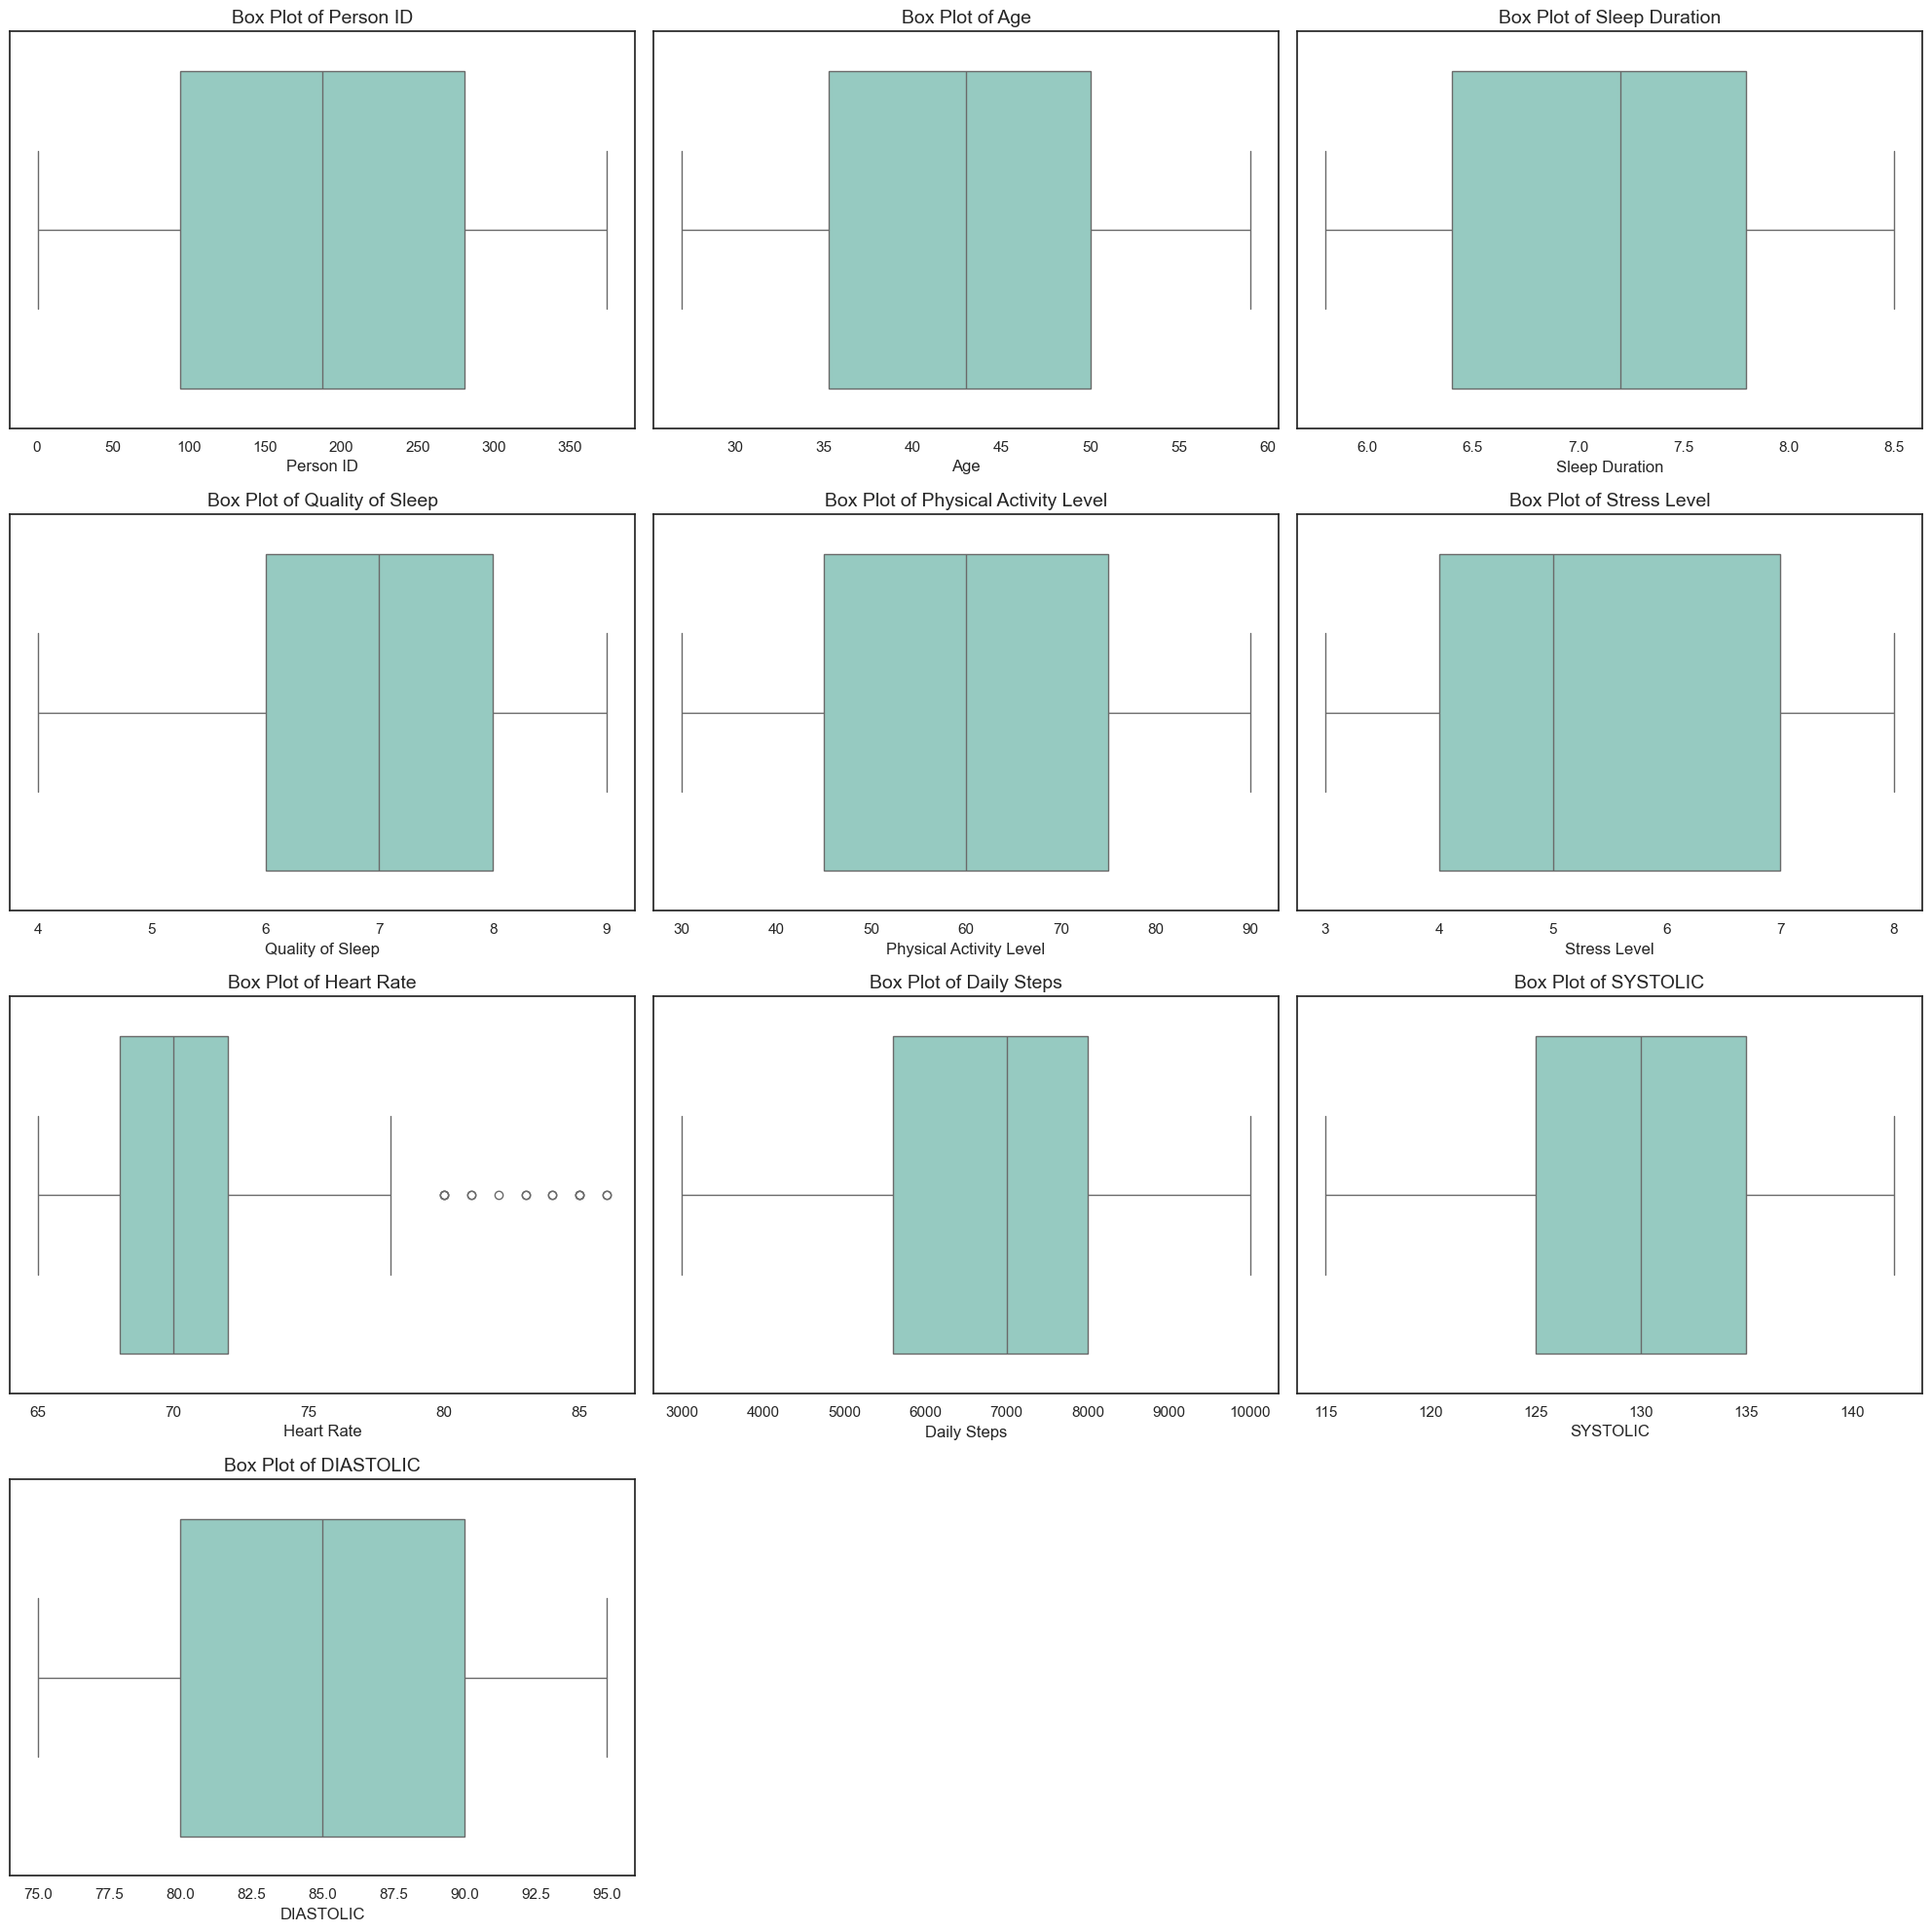

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Seaborn settings
sns.set(style="white")
sns.set_palette(palette='Set3')

# List of key numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# PairGrid instance, mapping a histogram+KDE to the diagonal and regplot to the off-diagonal elements
pair_grid = sns.PairGrid(data=df[num_vars], diag_sharey=False)
pair_grid.map_diag(sns.histplot, kde=True)
pair_grid.map_offdiag(sns.regplot, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Correlation matrix
corr_matrix = df[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,linewidths=0.5)
plt.title('Correlation matrix of numerical variables', fontsize=16)
plt.show()

# Box plots to identify any outliers (updated with dynamic grid layout)
num_vars_count = len(num_vars)
ncols = 3  # Number of columns for the grid
nrows = math.ceil(num_vars_count / ncols)  # Dynamically calculate rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))  # Adjust height dynamically
axes = axes.flatten()  # Flatten axes for easy access

for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)

# Turn off unused axes
for j in range(len(num_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

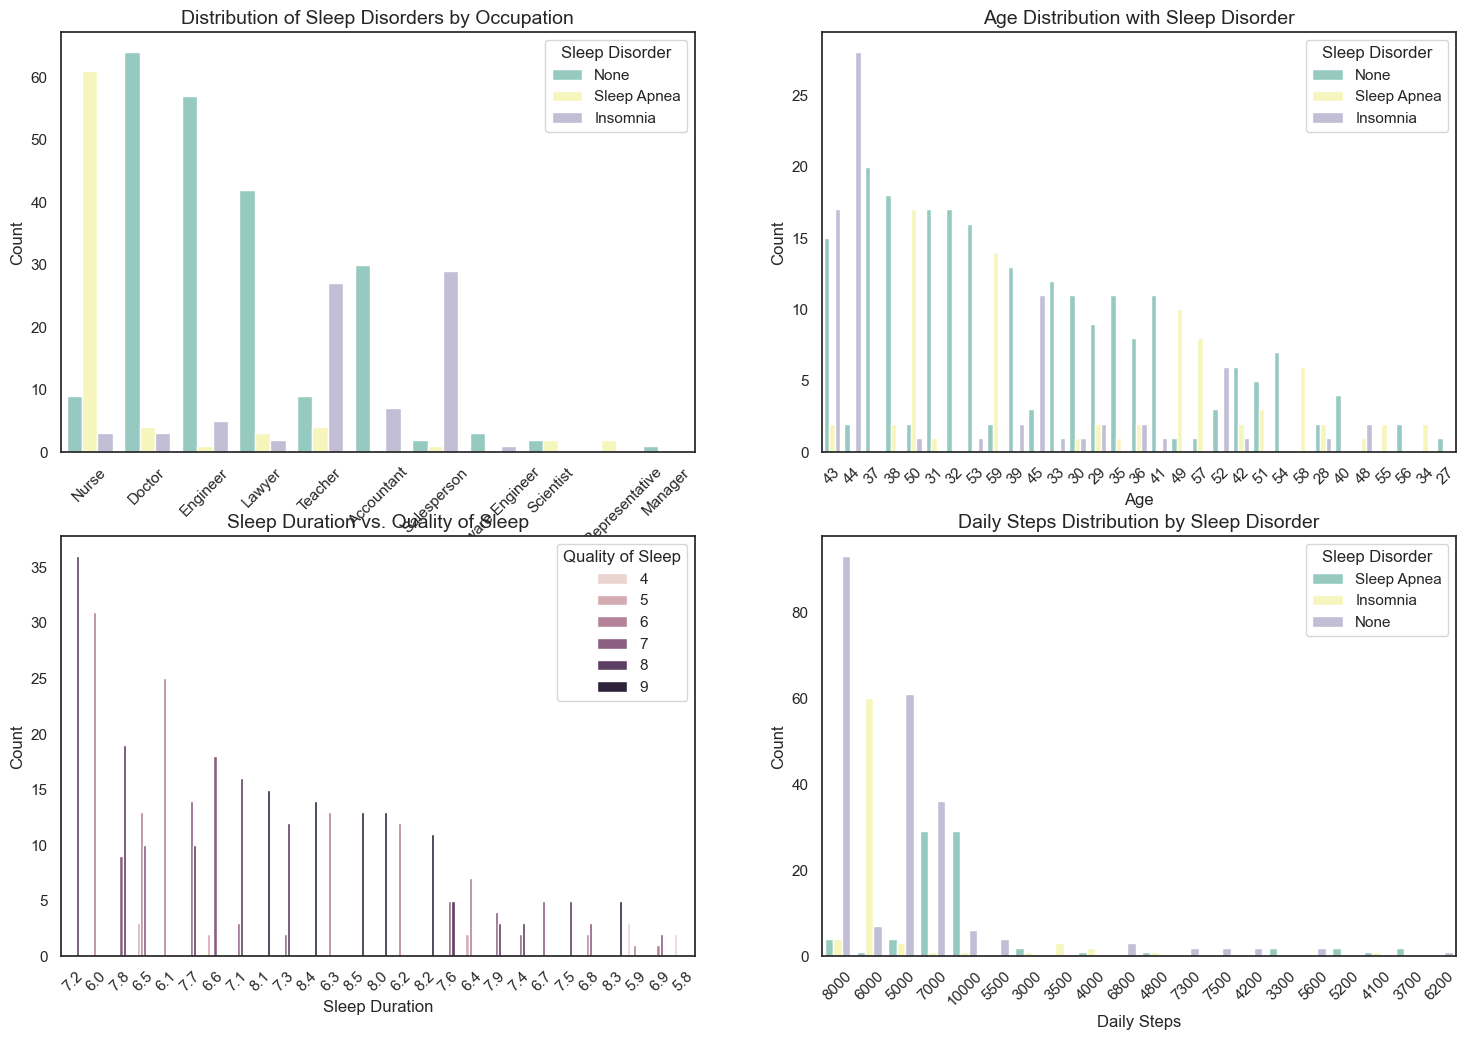

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Distribution of Sleep Disorders by Occupation
sns.countplot(x='Occupation',hue='Sleep Disorder', data=df,ax=axes[0, 0],order=df['Occupation'].value_counts().index)
axes[0, 0].set_title('Distribution of Sleep Disorders by Occupation', fontsize=14)
axes[0, 0].set_xlabel('Occupation', fontsize=12)  # Adjusted label to fit x-axis category
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Age Distribution with Sleep Disorder
sns.countplot(x='Age',hue='Sleep Disorder', data=df,ax=axes[0, 1],order=df['Age'].value_counts().index)
axes[0, 1].set_title('Age Distribution with Sleep Disorder', fontsize=14)
axes[0, 1].set_xlabel('Age', fontsize=12)  # Adjusted label to fit x-axis category
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)


# Plot 3: Sleep Duration vs. Quality of Sleep
sns.countplot(x='Sleep Duration',hue='Quality of Sleep', data=df,ax=axes[1, 0],order=df['Sleep Duration'].value_counts().index)
axes[1, 0].set_title('Sleep Duration vs. Quality of Sleep', fontsize=14)
axes[1, 0].set_xlabel('Sleep Duration', fontsize=12)  # Adjusted label to fit x-axis category
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Daily Steps Distribution by Sleep Disorder
sns.countplot(x='Daily Steps',hue='Sleep Disorder', data=df,ax=axes[1, 1],order=df['Daily Steps'].value_counts().index)
axes[1, 1].set_title('Daily Steps Distribution by Sleep Disorder', fontsize=14)
axes[1, 1].set_xlabel('Daily Steps', fontsize=12)  # Adjusted label to fit x-axis category
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

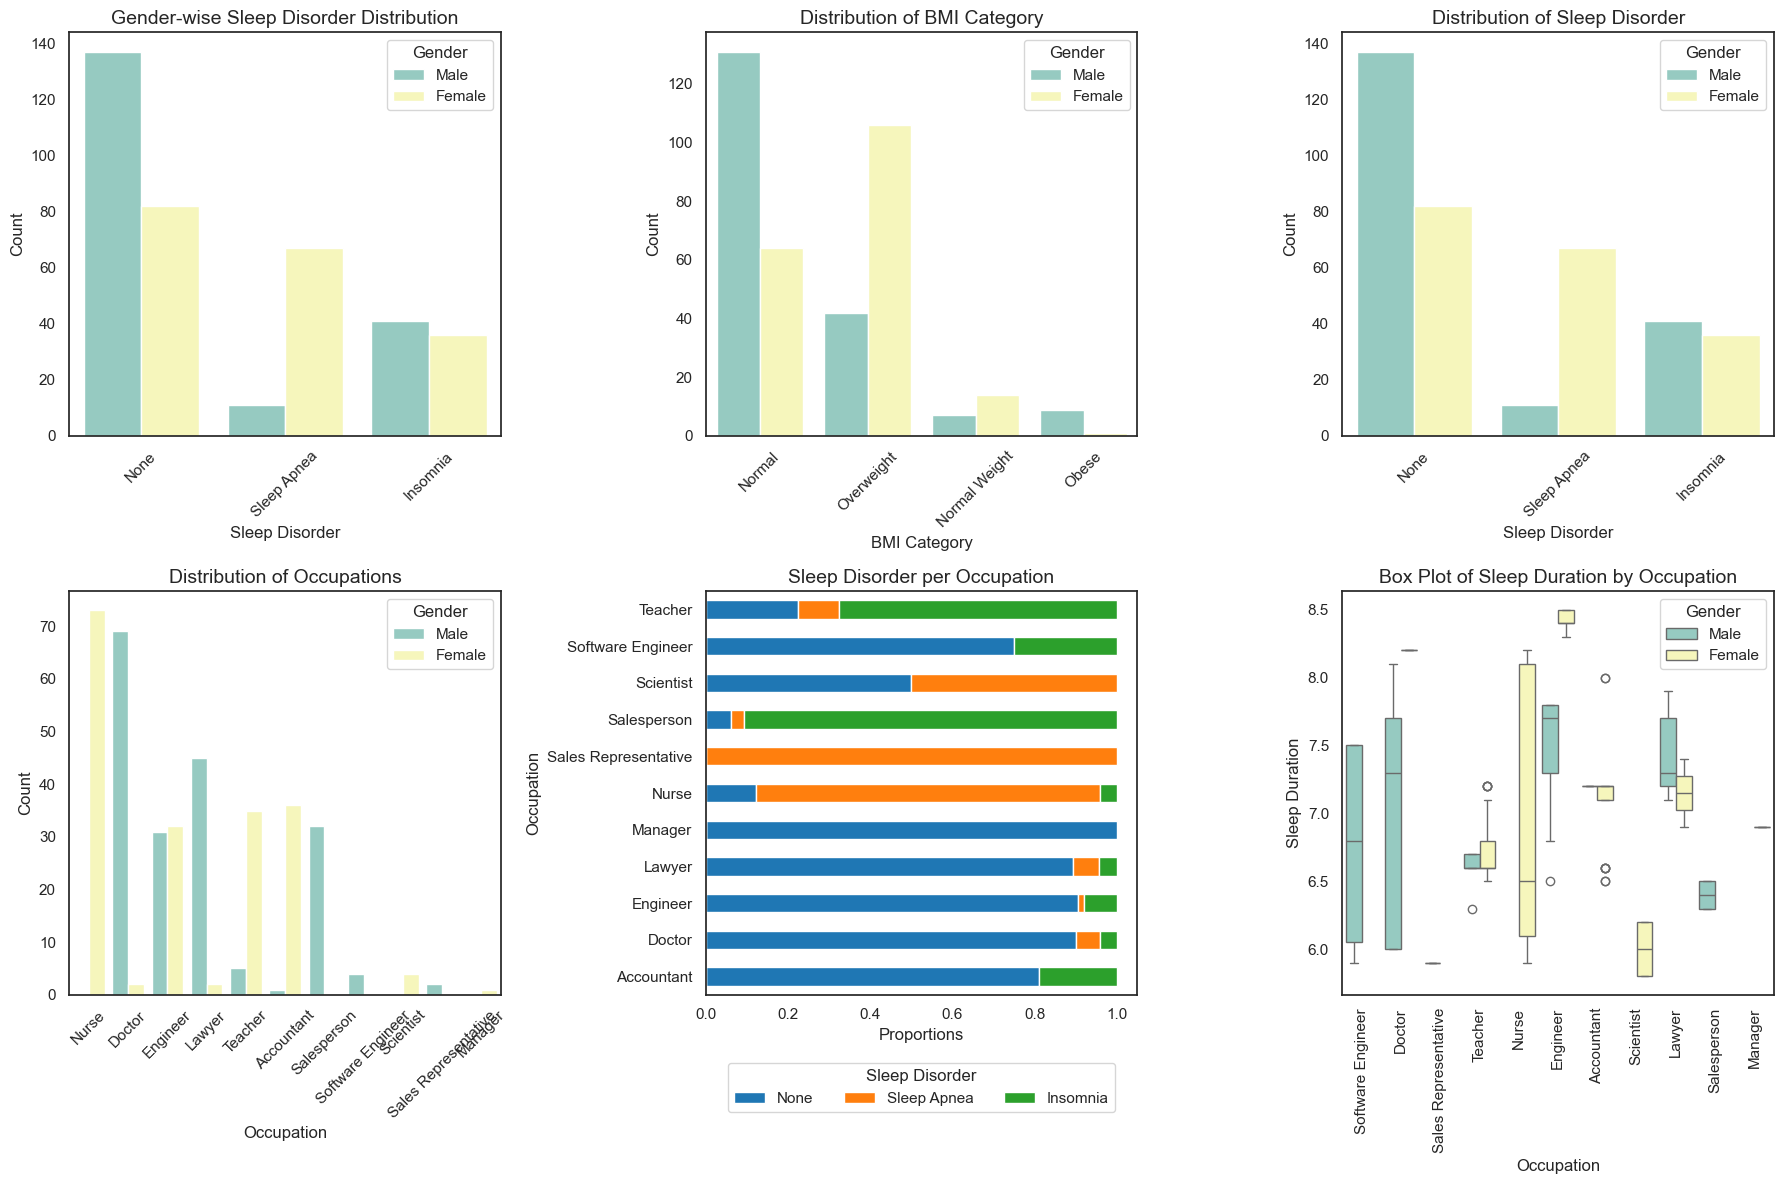

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Distribution of Gender with different colors
sns.countplot(x='Sleep Disorder',hue='Gender', data=df,ax=axes[0, 0],order=df['Sleep Disorder'].value_counts().index)
axes[0, 0].set_title('Gender-wise Sleep Disorder Distribution', fontsize=14)
axes[0, 0].set_xlabel('Sleep Disorder', fontsize=12)  # Adjusted label to fit x-axis category
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)



# Plot 2: Distribution of BMI Category
sns.countplot(x='BMI Category',hue='Gender', data=df, ax=axes[0, 1], order=df['BMI Category'].value_counts().index)
axes[0, 1].set_title('Distribution of BMI Category', fontsize=14)
axes[0, 1].set_xlabel('BMI Category', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Distribution of Sleep Disorder
sns.countplot(x='Sleep Disorder',hue='Gender',data=df, ax=axes[0, 2], order=df['Sleep Disorder'].value_counts().index)
axes[0, 2].set_title('Distribution of Sleep Disorder', fontsize=14)
axes[0, 2].set_xlabel('Sleep Disorder', fontsize=12)
axes[0, 2].set_ylabel('Count', fontsize=12)
axes[0, 2].tick_params(axis='x', rotation=45)


# Plot 4: Distribution of Occupation
sns.countplot(x='Occupation',hue='Gender', data=df, ax=axes[1, 0], order=df['Occupation'].value_counts().index)
axes[1, 0].set_title('Distribution of Occupations', fontsize=14)
axes[1, 0].set_xlabel('Occupation', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 5: Sleep Disorder proportions per Occupation
occup_dis = df.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack(fill_value=0)
order_sleep_disorder = ['None', 'Sleep Apnea', 'Insomnia']
occup_dis = occup_dis.reindex(columns=order_sleep_disorder, fill_value=0)

occup_dis.plot(kind='barh', stacked=True, ax=axes[1, 1], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 1].set_title('Sleep Disorder per Occupation', fontsize=14)
axes[1, 1].set_xlabel('Proportions', fontsize=12)
axes[1, 1].set_ylabel('Occupation', fontsize=12)
axes[1, 1].legend(title='Sleep Disorder', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Plot 6: Sleep Duration by Occupation
sns.boxplot(data=df, y='Sleep Duration', x='Occupation',hue='Gender', ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of Sleep Duration by Occupation', fontsize=14)
axes[1, 2].set_xlabel('Occupation', fontsize=12)
axes[1, 2].set_ylabel('Sleep Duration', fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

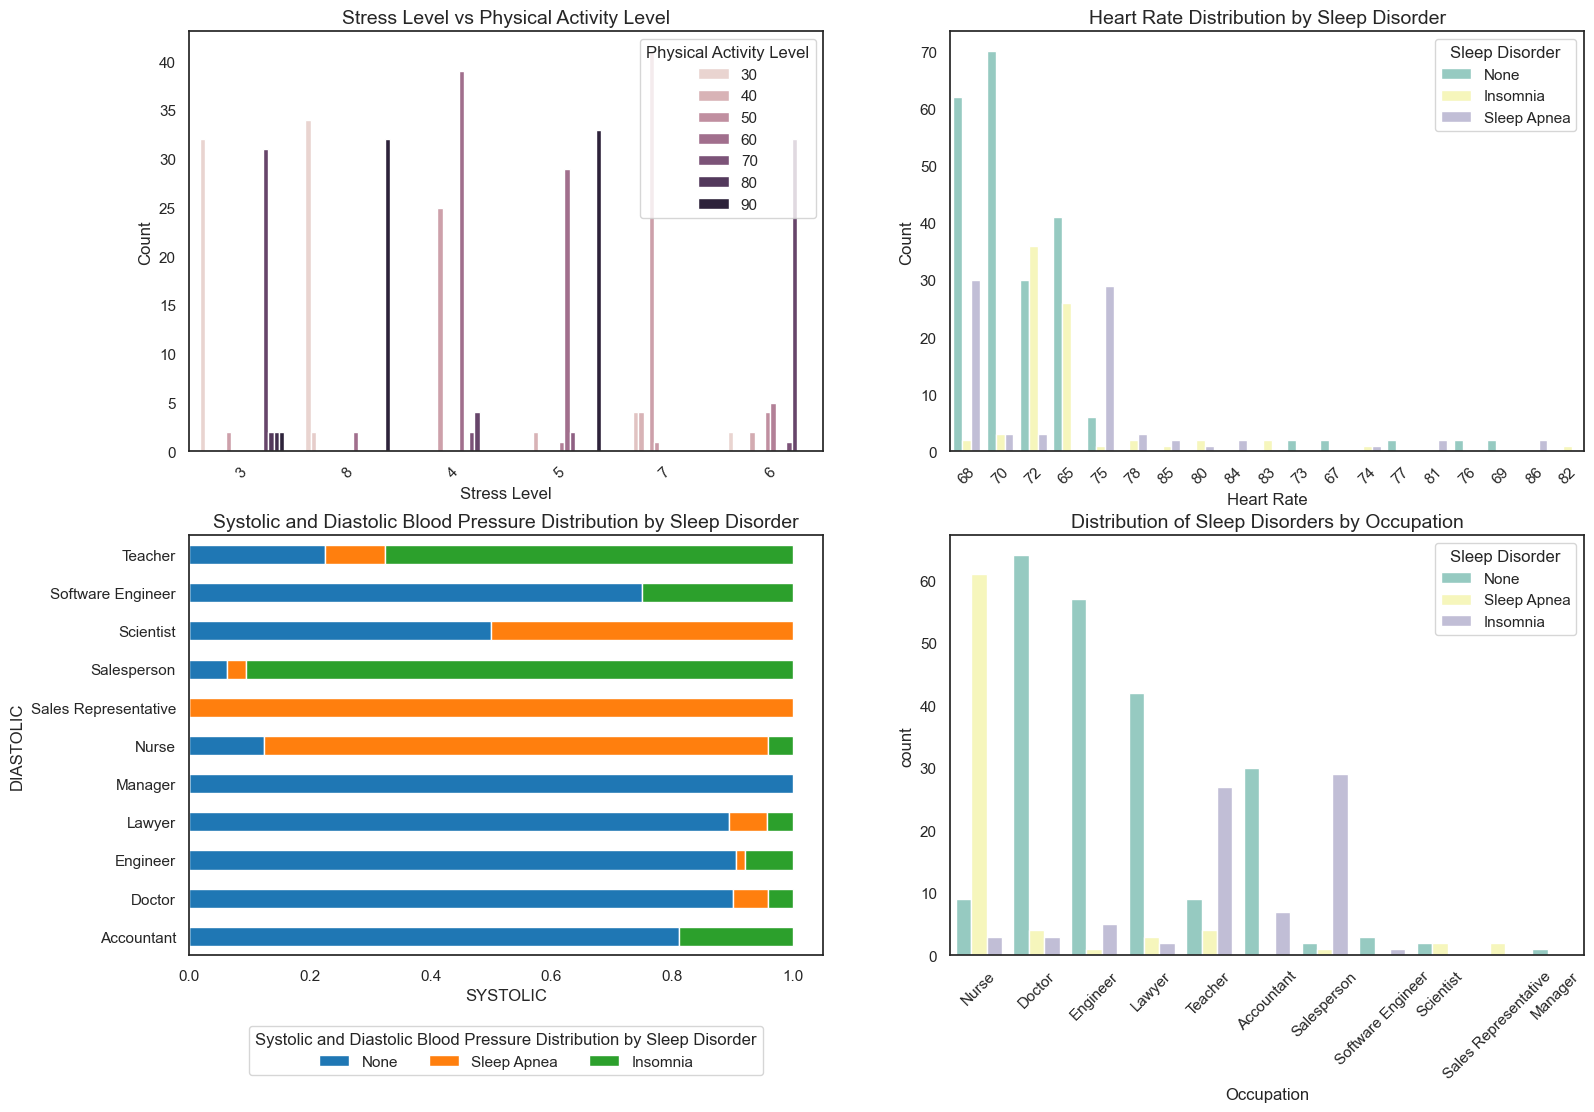

In [58]:
fig, axes = plt.subplots(2,2, figsize=(18, 12))
# Plot 1: Distribution of Sleep Disorder
sns.countplot(x='Stress Level',hue='Physical Activity Level',data=df, ax=axes[0, 0], order=df['Stress Level'].value_counts().index)
axes[0, 0].set_title('Stress Level vs Physical Activity Level', fontsize=14)
axes[0, 0].set_xlabel('Stress Level', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)


#plot 2: Heart Rate Distribution by Sleep Disorder
sns.countplot(x='Heart Rate',hue='Sleep Disorder',data=df, ax=axes[0, 1], order=df['Heart Rate'].value_counts().index)
axes[0, 1].set_title('Heart Rate Distribution by Sleep Disorder', fontsize=14)
axes[0, 1].set_xlabel('Heart Rate', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)


occup_dis.plot(kind='barh', stacked=True, ax=axes[1, 0], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].set_title('Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder', fontsize=14)
axes[1, 0].set_xlabel('SYSTOLIC', fontsize=12)
axes[1, 0].set_ylabel('DIASTOLIC', fontsize=12)
axes[1, 0].legend(title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)



#plot 4: Distribution of Sleep Disorders by Occupation
sns.countplot(x='Occupation',hue='Sleep Disorder',data=df, ax=axes[1, 1], order=df['Occupation'].value_counts().index)
axes[1, 1].set_title('Distribution of Sleep Disorders by Occupation', fontsize=14)
axes[1, 1].set_xlabel('Occupation', fontsize=12)
axes[1, 1].set_ylabel('count', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

In [59]:
#Renaming

In [60]:
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

data['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [61]:
data['Occupation'].value_counts()


Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [62]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: Occupation, dtype: int64

In [63]:
#Encoding

In [64]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: Occupation, dtype: int64

In [65]:
data['Sleep Disorder'].value_counts()


None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [66]:
#Balancing and scaling

In [67]:
!pip install imbalanced-learn

In [68]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Encoding categorical columns using LabelEncoder
labelencoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = labelencoder.fit_transform(data[column])

# Separating features and target
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)


In [69]:
#Splitting and Model Building


In [70]:
df.shape

(374, 15)

In [71]:
data.shape


(374, 13)

In [72]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import joblib
import os



In [73]:
model = XGBClassifier()

In [74]:
from imblearn.over_sampling import SMOTE

# SMOTE  example
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [75]:
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# # Save the scaler using joblib
joblib.dump(scaler, 'minmax_scaler_split.pkl')

print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


In [95]:
# 🚀 Scale the Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🚀 Save the Scaler
os.makedirs("modeljp15", exist_ok=True)
joblib.dump(scaler, "modeljp15/scalerjp2.pkl")
print("✅ Scaler saved successfully!")


✅ Scaler saved successfully!


In [96]:
# 🚀 Apply SMOTE to create more samples of minority classes
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)

# 🚀 Count the samples for each class
class_counts = Counter(y_resampled)
min_class_count = min(class_counts.values())

# 🚀 Apply RandomUnderSampler to ensure perfect balance of classes
under_sampler = RandomUnderSampler(sampling_strategy={0: min_class_count, 1: min_class_count, 2: min_class_count}, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# 🚀 Check the balanced data
balanced_counts = Counter(y_resampled)
print(f"✅ Class Distribution After Balancing: {balanced_counts}")


✅ Class Distribution After Balancing: Counter({0: 219, 1: 219, 2: 219})


In [97]:
# 🚀 Initialize and Train Optimized XGBoost Model
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=1
)

# 🚀 Train the model with balanced data
model.fit(X_resampled, y_resampled)
print("✅ Model training completed successfully!")


✅ Model training completed successfully!


In [98]:
# 🚀 Initialize and Train Optimized XGBoost Model
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    
    eval_metric='mlogloss',
    random_state=1
)

# 🚀 Train the model with balanced data
model.fit(X_resampled, y_resampled)
print("✅ Model training completed successfully!")


✅ Model training completed successfully!


In [99]:
# 🚀 Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🚀 Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔍 Model Accuracy: {accuracy * 100:.2f}%\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))



🔍 Model Accuracy: 94.70%

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.91      0.95      0.93        41
           2       0.93      0.95      0.94        40

    accuracy                           0.95       132
   macro avg       0.94      0.95      0.95       132
weighted avg       0.95      0.95      0.95       132



In [100]:
# 🚀 Save the trained model
joblib.dump(model, "modeljp15/trained_modeljp2.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [101]:
# 🚀 Save the trained model
joblib.dump(model, "modeljp15/trained_modeljp2.pkl")
joblib.dump(scaler, "modeljp15/scalerjp2.pkl")
print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [102]:
import pickle

with open("modeljp15/trained_modeljp2.pkl", "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully!")


Model loaded successfully!


In [103]:
import joblib

model = joblib.load("modeljp15/trained_modeljp2.pkl")


In [104]:
!pip install -U scikit-learn xgboost lightgbm


In [105]:
import pickle

with open("modeljp15/trained_modeljp2.pkl", "wb") as f:
    pickle.dump(model, f)


In [106]:
import os
print(os.path.exists("model.pkl"))  # model file name correct ah irukka nu check pannunga


True


In [88]:
# import os
# print(os.getcwd())  # Current working directory
# print(os.listdir())  # List of files in the current directory


C:\Users\HP\jp1
['.ipynb_checkpoints', 'appjp1.py', 'data.csv', 'jp12.ipynb', 'model.pkl', 'modeljp', 'modeljp15', 'new.ipynb', 'requirementsjp1.txt']


In [89]:
import pickle

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


In [90]:
# import os

# if "modeljp" in os.listdir():
#     print("Rename the file to model.pkl")
#     os.rename("modeljp", "model.pkl")
